In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('blackFriday_train.csv')

print(df1.shape)
df1.head()

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df2 = pd.read_csv('blackFriday_test.csv')
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
df1.drop(['User_ID'],axis=1,inplace=True)

In [7]:
df1['Gender']=df1['Gender'].map({"F":0,"M":1})

In [8]:
df1

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,51-55,13,B,1,1,20,NaN,NaN,368
550064,P00375436,0,26-35,1,C,3,0,20,NaN,NaN,371
550065,P00375436,0,26-35,15,B,4+,1,20,NaN,NaN,137
550066,P00375436,0,55+,1,C,2,0,20,NaN,NaN,365


In [11]:
df1.Age.count()

550068

In [13]:
df1.nunique()

Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [15]:
df1['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [18]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df=pd.DataFrame({'Age'})
le.fit(df)

/home/inderpreet/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LabelEncoder()

In [20]:
df3=df1

In [22]:
df3.apply(preprocessing.LabelEncoder().fit_transform)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,672,0,0,10,0,2,0,2,43346,51445,6702
1,2376,0,0,10,0,2,0,0,4,10,12121
2,852,0,0,10,0,2,0,11,86772,233149,586
3,828,0,0,10,0,2,0,11,12,233148,494
4,2734,1,6,16,2,4,0,7,86773,233147,6301
...,...,...,...,...,...,...,...,...,...,...,...
550063,3567,1,5,13,1,1,1,19,8052,86986,126
550064,3568,0,2,1,2,3,0,19,8056,86985,129
550065,3568,0,2,15,1,4,1,19,8058,86984,34
550066,3568,0,6,1,2,2,0,19,166552,282570,123


In [24]:
df3['Product_Category_1']=df3['Product_Category_1'].fillna(df3['Product_Category_1'].mode()[0])
df3

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,51-55,13,B,1,1,20,NaN,NaN,368
550064,P00375436,0,26-35,1,C,3,0,20,NaN,NaN,371
550065,P00375436,0,26-35,15,B,4+,1,20,NaN,NaN,137
550066,P00375436,0,55+,1,C,2,0,20,NaN,NaN,365


In [25]:
df3['Product_Category_2']=df3['Product_Category_2'].fillna(df3['Product_Category_2'].mode()[0])
df3

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,8.0,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,8.0,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,8.0,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,51-55,13,B,1,1,20,8.0,NaN,368
550064,P00375436,0,26-35,1,C,3,0,20,8.0,NaN,371
550065,P00375436,0,26-35,15,B,4+,1,20,8.0,NaN,137
550066,P00375436,0,55+,1,C,2,0,20,8.0,NaN,365


In [27]:
df3['Product_Category_3']=df3['Product_Category_3'].fillna(df3['Product_Category_3'].mode()[0])
df3

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,8.0,16.0,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,8.0,16.0,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,16.0,1057
4,P00285442,1,55+,16,C,4+,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,51-55,13,B,1,1,20,8.0,16.0,368
550064,P00375436,0,26-35,1,C,3,0,20,8.0,16.0,371
550065,P00375436,0,26-35,15,B,4+,1,20,8.0,16.0,137
550066,P00375436,0,55+,1,C,2,0,20,8.0,16.0,365


In [28]:
df3.describe()

,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,0.753105,8.076707,0.409653,5.404270,9.260768,14.989567,9263.968713
std,0.431205,6.522660,0.491770,3.936211,4.294093,2.739846,5023.065394
min,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.000000,2.000000,0.000000,1.000000,8.000000,16.000000,5823.000000
50%,1.000000,7.000000,0.000000,5.000000,8.000000,16.000000,8047.000000
75%,1.000000,14.000000,1.000000,8.000000,14.000000,16.000000,12054.000000
max,1.000000,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [29]:
df3.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [30]:
df3['Stay_In_Current_City_Years']=df3.Stay_In_Current_City_Years.str.replace('+','')

In [31]:
df3

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,8.0,16.0,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,8.0,16.0,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,16.0,1057
4,P00285442,1,55+,16,C,4,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,51-55,13,B,1,1,20,8.0,16.0,368
550064,P00375436,0,26-35,1,C,3,0,20,8.0,16.0,371
550065,P00375436,0,26-35,15,B,4,1,20,8.0,16.0,137
550066,P00375436,0,55+,1,C,2,0,20,8.0,16.0,365


/home/inderpreet/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

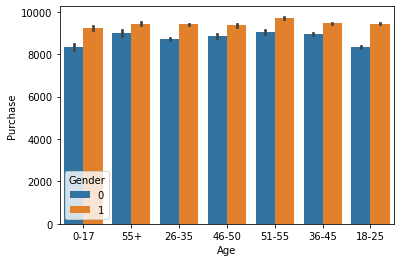

In [32]:
sns.barplot('Age','Purchase',hue='Gender',data=df3)

In [33]:
X=df3.drop('Purchase',axis=1)
y=df3.Purchase

In [34]:
X
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [35]:
X=df3.drop('Purchase',axis=1)
y=df3.Purchase
print(X.shape)
print(y.shape)

(550068, 10)
(550068,)


In [36]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(412551, 10)
(412551,)
(137517, 10)
(137517,)


In [39]:
# Feature Scaling So that data in all the columns are to the same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [43]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

ValueError: could not convert string to float: 'P00011842'